In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import pandas as pd
import nsfg

In [2]:
resp = nsfg.ReadFemResp() 

In [3]:
hieduc = resp['hieduc'] 
school = resp[resp.hieduc <= 10]
university = resp[resp.hieduc>10] 

In [8]:
agemomb1 = resp['agemomb1'] 
std=str(agemomb1.std())  
mean=str(agemomb1.mean())
median=str(agemomb1.median())
minumum=str(agemomb1.min())
maximum=str(agemomb1.max()) 
'5 descriptive statistic: standart deviation: ' + std + ', mean: ' + mean + ', median:' +median+',min:'+ minumum +',max:'+maximum

'5 descriptive statistic: standart deviation: 10.812288996229674, mean: 3.982075101399974, median:3.0,min:1,max:96'

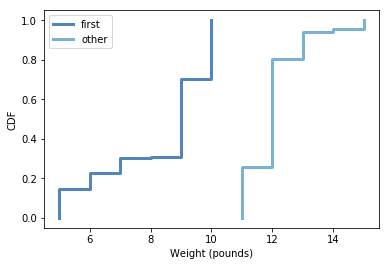

In [11]:
import thinkstats2
import thinkplot
first_cdf = thinkstats2.Cdf(school.hieduc, label='first')
other_cdf = thinkstats2.Cdf(university.hieduc, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

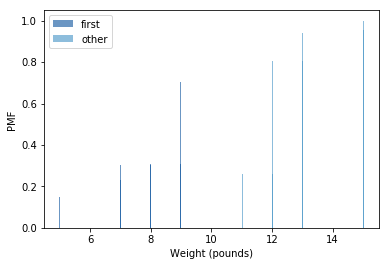

In [13]:
width = 0.5 / 20
# plot PMFs
thinkplot.PrePlot(2)
thinkplot.Hist(first_cdf, align='right', width=width)
thinkplot.Hist(other_cdf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

In [15]:
weights = resp.age_r.dropna()

Mean, Var 29.503804565478575 68.28602877718379
Sigma 8.263536094020754


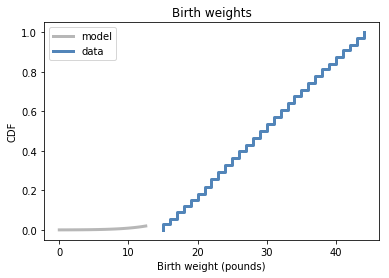

In [17]:

# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(weights, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Birth weights',
                 xlabel='Birth weight (pounds)',
                 ylabel='CDF')